# Setting Up Grid, Obstacles, and Start/Goal Positions
#### Defines a 100x100 grid.
#### Specifies movement actions with corresponding coordinate changes.
#### Places obstacles randomly across 20% of the grid cells.
#### Randomly selects start and goal positions, ensuring they don't coincide or overlap with obstacles.

In [1]:
import numpy as np
import random

# Grid size
GRID_SIZE = 100

# Action definitions for moving up, down, left, or right
ACTIONS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}
ACTION_LIST = list(ACTIONS.keys())

# Randomly placing obstacles across 20% of the grid
OBSTACLE_PERCENTAGE = 0.2  # 20% of the grid cells are obstacles
obstacles = set()
while len(obstacles) < int(OBSTACLE_PERCENTAGE * GRID_SIZE * GRID_SIZE):
    obstacles.add((random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)))

# Assigning random start and goal positions
start = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
goal = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))

# Ensuring the goal position is not the same as the start or in obstacles
while goal == start or goal in obstacles:
    goal = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))


#  Rewards and Parameters
#### Defines rewards
##### Reaching the goal gives +100.
##### Encountering an obstacle results in -100.
##### Regular moves cost -1.
#### DISCOUNT_FACTOR of 0.99 determines how future rewards are weighted.

In [2]:
# Rewards and parameters for Value Iteration
REWARD_GOAL = 100
REWARD_OBSTACLE = -100
REWARD_MOVE = -1
DISCOUNT_FACTOR = 0.99

# Initialize the value function as a 2D array
value_function = np.zeros((GRID_SIZE, GRID_SIZE))


# Utility Functions for State Validity, Next State Calculation, and Reward
####  Checking Validity of a State
#### State is within grid boundaries and not an obstacle

In [3]:
def is_valid(state):
    """Check if the given state is within bounds and not an obstacle."""
    x, y = state
    if x < 0 or x >= GRID_SIZE or y < 0 or y >= GRID_SIZE:
        return False
    return state not in obstacles


#### Determining the Next State Based on an Action

In [4]:
def get_next_state(state, action):
    """Return the next state after taking an action."""
    dx, dy = ACTIONS[action]
    next_state = (state[0] + dx, state[1] + dy)
    if is_valid(next_state):
        return next_state
    return state


#### Defining Reward Based on the State

In [5]:
def reward(state):
    """Return the reward for the given state."""
    if state == goal:
        return REWARD_GOAL
    if state in obstacles:
        return REWARD_OBSTACLE
    return REWARD_MOVE


# Value Iteration Function

In [6]:
def value_iteration():
    """Perform value iteration to find optimal value function."""
    threshold = 1e-4  # Convergence threshold
    while True:
        delta = 0  # Tracks the maximum change across all states
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                state = (x, y)
                if state in obstacles:
                    continue  # Skip obstacles

                v = value_function[x, y]
                value_function[x, y] = max(
                    reward(state) + DISCOUNT_FACTOR * value_function[get_next_state(state, action)]
                    for action in ACTION_LIST
                )
                delta = max(delta, abs(v - value_function[x, y]))  # Update the maximum change

        # If the change is below the threshold, stop iterating
        if delta < threshold:
            break


# Policy Extraction from the Value Function

In [7]:
def extract_policy():
    """Extract the optimal policy from the value function."""
    policy = {}
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            state = (x, y)
            if state in obstacles or state == goal:
                continue  # Skip obstacles and goal

            # Select the action that maximizes the expected value
            policy[state] = max(
                ACTION_LIST,
                key=lambda action: reward(state) + DISCOUNT_FACTOR * value_function[get_next_state(state, action)]
            )
    return policy


In [8]:
value_iteration()  # Run value iteration to compute the optimal value function
policy_vi = extract_policy()  # Extract policy based on the computed value function

# Output the resulting policy
print("Optimal Policy from Value Iteration:", policy_vi)


Optimal Policy from Value Iteration: {(0, 0): 'down', (0, 1): 'down', (0, 2): 'down', (0, 4): 'down', (0, 5): 'down', (0, 6): 'down', (0, 7): 'down', (0, 8): 'down', (0, 10): 'down', (0, 11): 'down', (0, 12): 'right', (0, 13): 'right', (0, 14): 'right', (0, 15): 'down', (0, 16): 'down', (0, 17): 'down', (0, 19): 'right', (0, 20): 'down', (0, 21): 'down', (0, 22): 'down', (0, 23): 'down', (0, 24): 'down', (0, 25): 'down', (0, 26): 'down', (0, 27): 'down', (0, 28): 'down', (0, 29): 'down', (0, 30): 'right', (0, 31): 'down', (0, 32): 'down', (0, 33): 'down', (0, 34): 'down', (0, 35): 'down', (0, 36): 'left', (0, 37): 'down', (0, 38): 'down', (0, 39): 'down', (0, 40): 'down', (0, 41): 'down', (0, 42): 'down', (0, 43): 'down', (0, 44): 'down', (0, 45): 'down', (0, 46): 'down', (0, 48): 'down', (0, 50): 'down', (0, 51): 'down', (0, 52): 'down', (0, 53): 'down', (0, 54): 'down', (0, 55): 'down', (0, 56): 'down', (0, 57): 'down', (0, 58): 'down', (0, 61): 'down', (0, 63): 'down', (0, 64): 'dow

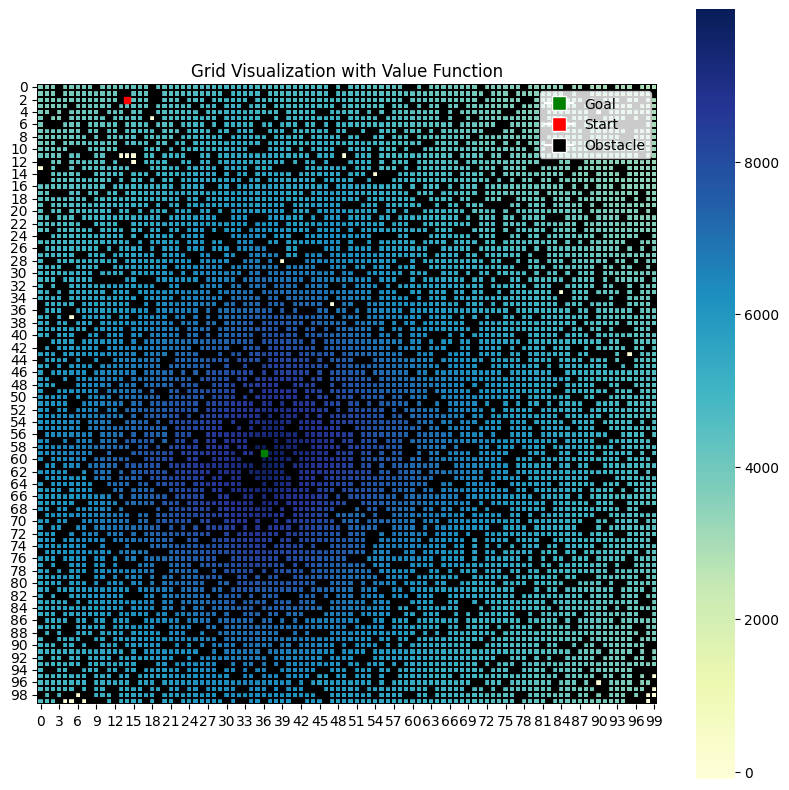

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_grid(value_function, start, goal, obstacles):
    """Visualize the grid with value function after value iteration."""
    plt.figure(figsize=(10, 10))

    # Display the value function as a heatmap
    sns.heatmap(
        value_function,
        annot=False,
        cmap="YlGnBu",
        cbar=True,
        square=True,
        linewidths=0.1,
        linecolor="black"
    )

    # Mark obstacles with a distinct color (black)
    for (x, y) in obstacles:
        plt.gca().add_patch(plt.Rectangle((y, x), 1, 1, color="black"))

    # Mark the goal with a distinct color (green)
    plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color="green", label="Goal"))

    # Mark the start position with a distinct color (red)
    plt.gca().add_patch(plt.Rectangle((start[1], start[0]), 1, 1, color="red", label="Start"))

    # Display plot title and legend
    plt.title("Grid Visualization with Value Function")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Goal"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Start"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="black", markersize=10, label="Obstacle")
    ], loc="upper right")

    plt.show()

# Call visualization function
visualize_grid(value_function, start, goal, obstacles)


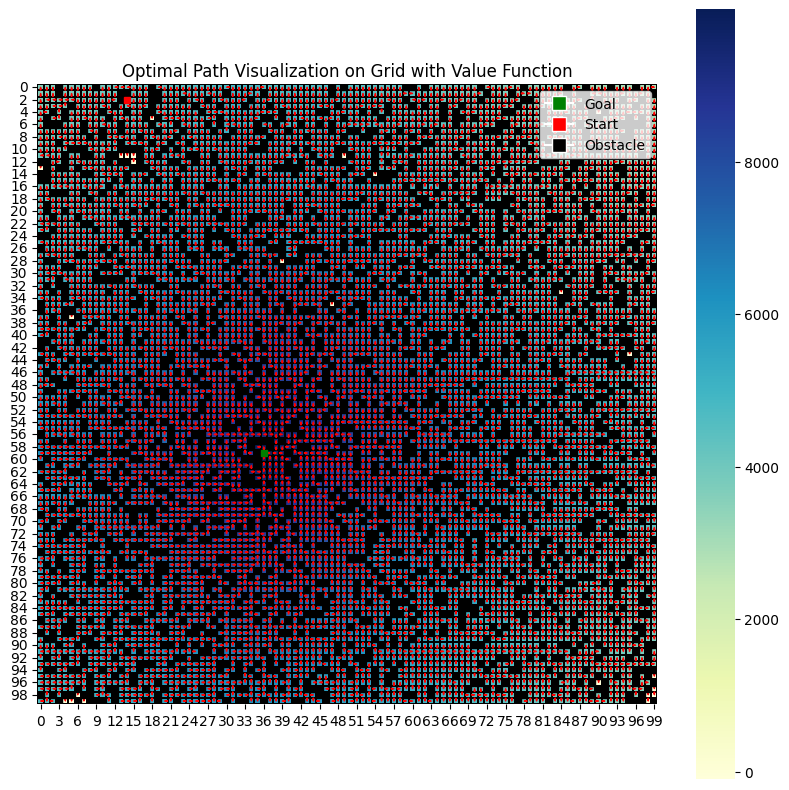

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_optimal_path(value_function, policy, start, goal, obstacles):
    """Visualize the grid with the value function and optimal path arrows."""

    # Set up plot
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        value_function,
        annot=False,
        cmap="YlGnBu",
        cbar=True,
        square=True,
        linewidths=0.1,
        linecolor="black"
    )

    # Add arrows for the optimal policy
    for (x, y), action in policy.items():
        if (x, y) != goal and (x, y) not in obstacles:
            dx, dy = ACTIONS[action]
            plt.arrow(
                y + 0.5, x + 0.5, dy * 0.3, dx * 0.3,
                head_width=0.2, head_length=0.2, fc='red', ec='red'
            )

    # Mark obstacles with black
    for (x, y) in obstacles:
        plt.gca().add_patch(plt.Rectangle((y, x), 1, 1, color="black"))

    # Mark the goal with green
    plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color="green", label="Goal"))

    # Mark the start with red
    plt.gca().add_patch(plt.Rectangle((start[1], start[0]), 1, 1, color="red", label="Start"))

    # Display plot title and legend
    plt.title("Optimal Path Visualization on Grid with Value Function")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Goal"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Start"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="black", markersize=10, label="Obstacle")
    ], loc="upper right")

    plt.show()

# Call visualization function
visualize_optimal_path(value_function, policy_vi, start, goal, obstacles)


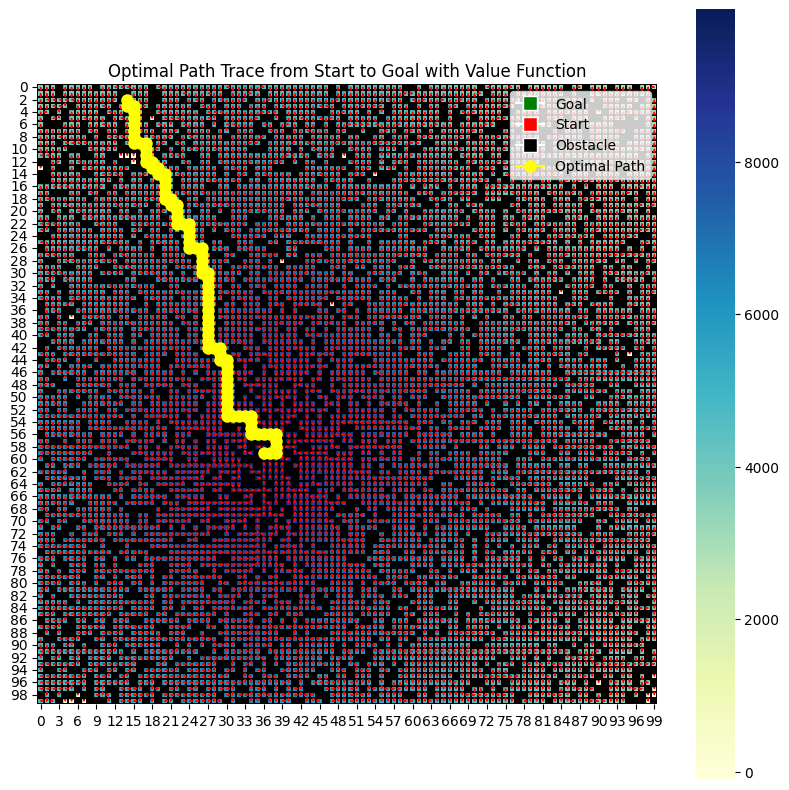

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def find_optimal_path(start, goal, policy):
    """Trace the optimal path from start to goal using the given policy."""
    path = [start]
    current_state = start

    while current_state != goal:
        if current_state in policy:
            # Get the optimal action from the policy
            action = policy[current_state]
            next_state = get_next_state(current_state, action)
            path.append(next_state)
            current_state = next_state
        else:
            # No policy defined (such as an obstacle or out of bounds), exit to prevent infinite loop
            break

    return path

def visualize_optimal_path_with_trace(value_function, policy, start, goal, obstacles):
    """Visualize the grid with the value function, optimal path arrows, and optimal path trace."""

    # Find the optimal path based on the policy
    optimal_path = find_optimal_path(start, goal, policy)

    # Set up plot
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        value_function,
        annot=False,
        cmap="YlGnBu",
        cbar=True,
        square=True,
        linewidths=0.1,
        linecolor="black"
    )

    # Add arrows for the optimal policy
    for (x, y), action in policy.items():
        if (x, y) != goal and (x, y) not in obstacles:
            dx, dy = ACTIONS[action]
            plt.arrow(
                y + 0.5, x + 0.5, dy * 0.3, dx * 0.3,
                head_width=0.2, head_length=0.2, fc='red', ec='red'
            )

    # Plot the optimal path with circles
    for (x, y) in optimal_path:
        plt.plot(y + 0.5, x + 0.5, 'o', color='yellow', markersize=8)

    # Mark obstacles with black
    for (x, y) in obstacles:
        plt.gca().add_patch(plt.Rectangle((y, x), 1, 1, color="black"))

    # Mark the goal with green
    plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color="green", label="Goal"))

    # Mark the start with red
    plt.gca().add_patch(plt.Rectangle((start[1], start[0]), 1, 1, color="red", label="Start"))

    # Display plot title and legend
    plt.title("Optimal Path Trace from Start to Goal with Value Function")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Goal"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Start"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="black", markersize=10, label="Obstacle"),
        plt.Line2D([0], [0], marker='o', color='yellow', label="Optimal Path", markersize=8)
    ], loc="upper right")

    plt.show()

# Run visualization with trace
visualize_optimal_path_with_trace(value_function, policy_vi, start, goal, obstacles)


In [12]:
import numpy as np
import random

# Q-learning implementation
def q_learning(episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    """Perform Q-learning to find the optimal policy."""
    # Initialize Q-table
    q_values = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTION_LIST)))

    for episode in range(episodes):
        state = start
        while state != goal:
            # Epsilon-greedy action selection
            action_idx = (
                np.random.randint(len(ACTION_LIST))
                if random.uniform(0, 1) < epsilon
                else np.argmax(q_values[state[0], state[1]])
            )
            action = ACTION_LIST[action_idx]

            # Take the action, observe the next state and reward
            next_state = get_next_state(state, action)
            reward_val = reward(next_state)

            # Update Q-value using Q-learning update rule
            best_next_action = np.argmax(q_values[next_state[0], next_state[1]])
            q_values[state[0], state[1], action_idx] += alpha * (
                reward_val + gamma * q_values[next_state[0], next_state[1], best_next_action] - q_values[state[0], state[1], action_idx]
            )
            state = next_state

    # Extract the policy based on Q-values
    policy = {
        (x, y): ACTION_LIST[np.argmax(q_values[x, y])]
        for x in range(GRID_SIZE)
        for y in range(GRID_SIZE)
        if (x, y) not in obstacles and (x, y) != goal
    }
    return policy


In [13]:
# SARSA implementation
def sarsa(episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    """Perform SARSA to find the optimal policy."""
    # Initialize Q-table
    q_values = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTION_LIST)))

    for episode in range(episodes):
        state = start
        action_idx = (
            np.random.randint(len(ACTION_LIST))
            if random.uniform(0, 1) < epsilon
            else np.argmax(q_values[state[0], state[1]])
        )
        action = ACTION_LIST[action_idx]

        while state != goal:
            # Take action, observe next state and reward
            next_state = get_next_state(state, action)
            reward_val = reward(next_state)

            # Choose next action based on epsilon-greedy policy
            next_action_idx = (
                np.random.randint(len(ACTION_LIST))
                if random.uniform(0, 1) < epsilon
                else np.argmax(q_values[next_state[0], next_state[1]])
            )
            next_action = ACTION_LIST[next_action_idx]

            # Update Q-value using SARSA update rule
            q_values[state[0], state[1], action_idx] += alpha * (
                reward_val + gamma * q_values[next_state[0], next_state[1], next_action_idx] - q_values[state[0], state[1], action_idx]
            )
            state = next_state
            action_idx = next_action_idx

    # Extract the policy based on Q-values
    policy = {
        (x, y): ACTION_LIST[np.argmax(q_values[x, y])]
        for x in range(GRID_SIZE)
        for y in range(GRID_SIZE)
        if (x, y) not in obstacles and (x, y) != goal
    }
    return policy


In [14]:
import matplotlib.pyplot as plt

def visualize_optimal_path_with_trace(value_function, policy, start, goal, obstacles):
    """Visualize the optimal path with traced actions."""
    # Create a grid for visualization
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    grid[start] = 1  # Mark start
    grid[goal] = 2   # Mark goal
    for obstacle in obstacles:
        grid[obstacle] = -1  # Mark obstacles

    # Trace the optimal path based on the policy
    path = [start]
    current_state = start
    while current_state != goal:
        action = policy.get(current_state)
        next_state = get_next_state(current_state, action)
        path.append(next_state)
        current_state = next_state

    # Plot the grid and path
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='Blues', origin='upper')

    # Mark the path
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], color='red', marker='o', markersize=3, label="Optimal Path")

    # Mark start and goal
    plt.plot(start[1], start[0], 'go', label="Start")
    plt.plot(goal[1], goal[0], 'ro', label="Goal")

    # Mark obstacles
    for obstacle in obstacles:
        plt.plot(obstacle[1], obstacle[0], 'ks', markersize=10)

    plt.legend()
    plt.title('Optimal Path Visualization')
    plt.show()



Visualizing Value Iteration Path:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


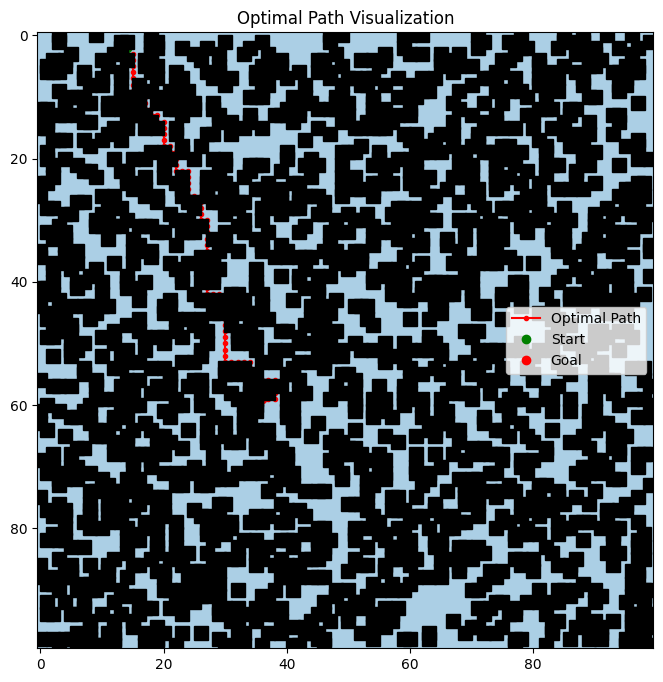

Visualizing Q-learning Path:


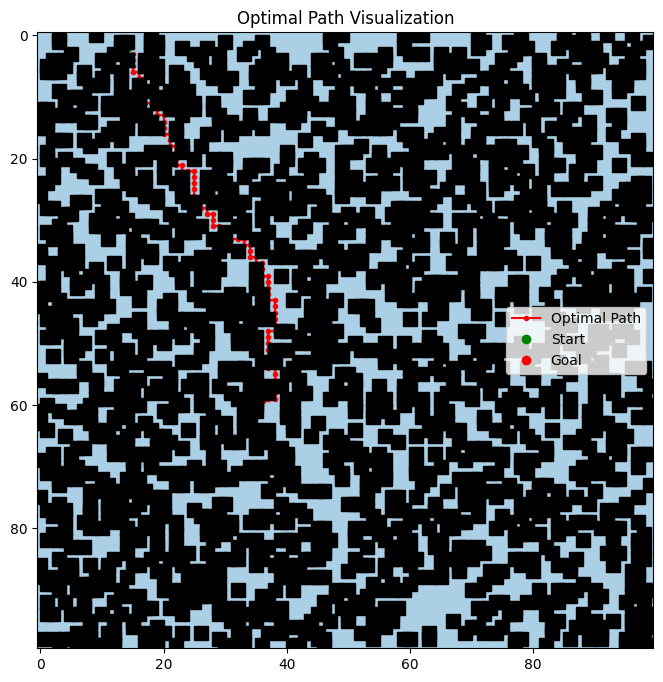

In [16]:
# Run Value Iteration
value_iteration()
policy_vi = extract_policy()

# Run Q-learning
policy_ql = q_learning()



# Visualize the optimal path for Value Iteration
print("Visualizing Value Iteration Path:")
visualize_optimal_path_with_trace(value_function, policy_vi, start, goal, obstacles)

# Visualize the optimal path for Q-learning
print("Visualizing Q-learning Path:")
visualize_optimal_path_with_trace(value_function, policy_ql, start, goal, obstacles)

# Visualize the optimal path for SARSA



In [17]:
# Run SARSA
policy_sarsa = sarsa()
print("Visualizing SARSA Path:")
visualize_optimal_path_with_trace(value_function, policy_sarsa, start, goal, obstacles)

KeyboardInterrupt: 